<center><font color="red" size=28 > <b> TP2:Interpolation Numérique </b></font></center>

<u><font color="green"><b>Introduction</b></font></u>

<u><font color="blue"><b>Interpolation</b></font></u>
 est une opération mathématique permettant de remplacer une courbe ou une fonction par une autre courbe (ou fonction) plus simple, mais qui coïncide avec la première en un nombre fini de points (ou de valeurs) donnés au départ. Suivant le type d'interpolation, outre le fait de coïncider en un nombre fini de points ou de valeurs, il peut aussi être demandé à la courbe ou à la fonction construite de vérifier des propriétés supplémentaires. Le choix des points (ou valeurs) de départ est un élément important dans l'intérêt de la construction.

<u><font color="blue"><b>Interpolation polynomiale</b></font></u>
 est une technique d'interpolation d'un ensemble de données ou d'une fonction par un polynôme. En d'autres termes, étant donné un ensemble de points (obtenu, par exemple, à la suite d'une expérience), on cherche un polynôme qui passe par tous ces points, et éventuellement vérifie d'autres conditions, de degré si possible le plus bas.
 
 f : [a, b] → R et N > 1 un entier naturel.

Soint <b>x0, x1, · · · , xN (N + 1)</b> points (appelés aussi des noeuds) deux à deux distincts dans [a, b].
Le but est de chercher à trouver un polynome p (à coefficients réels) vérifiant le système suivant :
<b>f(xi) = p(xi) </b>, pour tout i = 0, 1, · · · , N

<b>exemple interpolation polynomial</b><img src="exemple1.png"/>

<u><b>Objectif:</b></u> il s’agit de trouver une courbe, généralement polynomiale, soit qui passe par ces points, soit qui passe près de ces
points avec, éventuellement, des conditions supplémentaires (par exemple
sur la pente).

<u><font color="green"><b>Exercice 1 :</b></font></u>

**Polynome d'interpolation de Lagrange** 
> Soient $(x_0,y_0), \ldots,(x_k,y_k),\ldots ,(x_n,k_n)$ $n+1$ points deux à deux distincts, le polynôme d'interpolation de Lagrange associés à ces points supports est défini par :
> $$P_n(x)=\sum_{k=0}^{n-1} y_kL_k(x)$$

avec $L_{0}(x)=\displaystyle\frac{(x-x_1)(x-x_2)\ldots(x-x_{n})}{(x_0-x_1)(x_0-x_2)\ldots(x_0-x_{n})}$ et $L_{k}(x)=\displaystyle\frac{(x-x_1)(x-x_2)\ldots(x-x_{k-1})(x-x_{k+1})\ldots(x_0-x_{n})}{(x_k-x_0)(x_k-x_1)\ldots(x_k-x_{k-1})(x_k-x_{k+1})\ldots(x_k-x_{n})}$ pour $k\in \{1,\ldots,n\}$

1) Que renvoie la fonction PR lorsqu'on lui déclare  **x=(x(1),x(2),...,x(n))x=(x(1),x(2),...,x(n))**  et  **y=(y(1),y(2),...,y(n))y=(y(1),y(2),...,y(n))**  deux vecteurs de même longueur  `n` et `c`  un nombre réel donné.

In [1]:
from numpy import prod
def pr(x,y,c):
    S = []
    n = len(x)
   
    for j in range(n):
        L =[c-xx for xx in x]
        for k in range(n):
            if (k == j):               
                L[k] = 1
            else:
                L[k] = L[k]/(x[j] - x[k])  
        S.append(y[j]*prod(L))
       
    return  sum(S)

In [2]:
X=[1,2 ,3, 4]
Y=[-1 ,0 ,2 ,1]
for i in X:
            u=pr(X,Y,i)
            print(u)


-1.0
0.0
2.0
1.0


2) Que contient le vecteur  LL  après la fin de la boucle  kk .

In [3]:
x=[1 ,2 ,3 ,4]
y=[-1 ,0 ,2, 1]

In [4]:
S = y
n = len(x)
for c in X:
    for j in range(n):
        L =[c-xx for xx in x]
        for k in range(n):
                if (k == j):               
                         L[k] = 1
                else:
                         L[k] = L[k]/(x[j] - x[k]) 
                         S.append(y[j]*prod(L))


In [5]:
print(L)

[1.0, 1.0, 1.0, 1]


3) Utiliser cette fonction pour dessiner le graph du polynôme de Lagrange  de la fonction $f(x) = \dfrac{1}{1 + x^2}$ aux points $x=[-1:0.1:1]$.

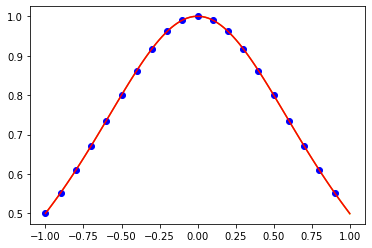

In [43]:
import matplotlib.pyplot as plt
import numpy as np
p=[]
x=np.arange(-1,1,0.1)
f=lambda x:1/(1+x**2)
y=f(x)
t=np.linspace(-1,1,100)
for u in range(len(t)):
    p.append(pr(x,y,t[u]))
plt.plot(t,p,"y",x,y,"bo",t,f(t),"r")
plt.show()

<b> <font color="orange">interprétation du courbe</font></b>
Les points bleu correspondent aux points (x , y)
et la courbe rouge  représente le polynôme d'interpolation.

<font color="red"> <u>Le polynôme d'interpolation de Lagrange </u>permet d'interpoler une série de points par un polynôme qui passe exactement par ces points appelés aussi nœuds</font>

4) On considère la fonction $F$ suivante :
$$
F(h) = \pi -\cos \left(\frac{h}{2}\right) + h \sqrt{1-\left(\frac{h}{2}\right)^2}, \qquad
h\in [0,2],
$$
et les points d'interpolation $x_i = ih$, $0\leq i\leq n$, avec $ n=20$ et $h=0.1$.

4.1) Représenter sur un même graphe la fonction $F$ et $p_n$, où
 $p_n$ est le polynôme d'interpolation de Lagrange de $F$ aux
 points $x_0,\,\ldots,\,x_n$.

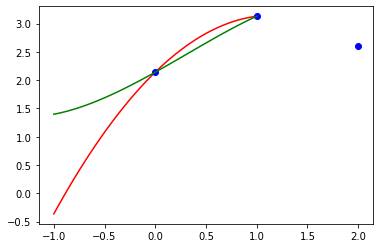

In [62]:
import math
import numpy as np 
import matplotlib.pyplot as plt
pn=[]
x=np.arange(0,3)
f=lambda x:math.pi-math.cos(x/2)+x*math.sqrt(1-(x/2)**2)
f2 = np.vectorize(f)
y2=f2(x)
t=np.linspace(-1,1,100)
for u in range(len(t)):
       pn.append(pr(x,y2,t[u])) 
plt.plot(t,pn,'r',x,y2,'bo',t,f2(t),'g')
plt.show()


2)Tracer la courbe d'erreur  (la
 fonction $F-p_n$). Qu'observer vous.

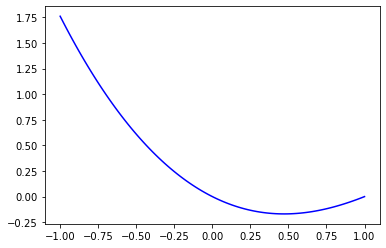

In [65]:
import math
import numpy as np 
import matplotlib.pyplot as plt
pn=[]
x=np.arange(0,3)
f=lambda x:math.pi-math.cos(x/2)+x*math.sqrt(1-(x/2)**2)
f2 = np.vectorize(f)
y2=f2(x)
t=np.linspace(-1,1,100)
for u in range(len(t)):
       pn.append(pr(x,y2,t[u])) 
plt.plot(t,f2(t)-pn,'b')
plt.show()


<u><font color="green"><b>Exercice 2 :</b></font></u>

1) Vérifier que sur $[-5,5]$ le polynôme d'interpolation de Lagrange
  de la fonction $f$ définie par $f(x)=\displaystyle{\frac{1}{1+x^2}}$,
en $N$ points uniformément espacés ne convergent pas correctement aux voisinages de $-1$ et $1$, pour $N=7,8,9,10 ...$

Text(0.5, 1.0, '     Interpolation Equidistante avec N=10')

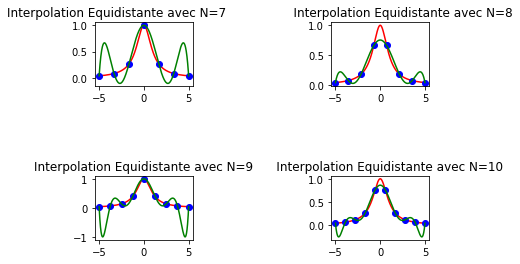

In [95]:
from numpy import linspace
from numpy import polyfit
from numpy import polyval
import matplotlib.pyplot as plt
N=7
X=linspace(-5,5,N)
f=lambda x:1/(1+x**2)
Y=f(X);
p=polyfit(X,Y,N-1)
t=linspace(-5,5,1000)
#plt.subplot(2,2,1)
plt.subplot(3,3,1)
plt.plot(t,f(t),'r',X,Y,'ob', t, polyval(p,t),'g')
plt.title("Interpolation Equidistante avec N=7              ")
#######################################################
N=8
X=linspace(-5,5,N)
f=lambda x:1/(1+x**2)
Y=f(X);
p=polyfit(X,Y,N-1)
t=linspace(-5,5,1000)
#plt.subplot(2,2,2)
plt.subplot(3,3,3)
plt.plot(t,f(t),'r',X,Y,'ob', t, polyval(p,t),'g')
plt.title("            Interpolation Equidistante avec N=8")
###########################################################
N=9
X=linspace(-5,5,N)
f=lambda x:1/(1+x**2)
Y=f(X);
p=polyfit(X,Y,N-1)
t=linspace(-5,5,1000)
#plt.subplot(2,2,3)
plt.subplot(3,3,7)
plt.plot(t,f(t),'r',X,Y,'ob', t, polyval(p,t),'g')
plt.title("Interpolation Equidistante avec N=9")
#############################################################
N=10
X=linspace(-5,5,N)
f=lambda x:1/(1+x**2)
Y=f(X);
p=polyfit(X,Y,N-1)
t=linspace(-5,5,1000)
#plt.subplot(2,2,4)
plt.subplot(3,3,9)
plt.plot(t,f(t),'r',X,Y,'ob', t, polyval(p,t),'g')
plt.title("     Interpolation Equidistante avec N=10")



2) Les points de Tchebycheff sur un intervalle $[a;b]$ sont définie par :
  $$x_k=\dfrac{a+b}{2}+\dfrac{a-b}{2}\cos\left(\frac{k-1}{n-1}\pi\right)\hspace{0.5cm} (k=1,..,n: x_1=a:x_n=b)$$

  Vérifier que sur $[-5; 5]$ ; l'interpolation polynômiale de $f(x) = \dfrac{1}{1 + x^2}$ ; en $N$ points de Tchebychev
est meilleure qu'une  interpolation utilisant $N$ points uniforment espacés (on prendra $N=10, 11, 16, 17$).

In [133]:
import math
import numpy as np
def tcheb(a,b,n):
    V=[]
    for k in range(1,n):
        V.append((a+b)/2+(a-b)/2*math.cos((k-1)/(n-1)*math.pi))
    return V

In [135]:
v=tcheb(-5,5,11)
print(v)

[-5.0, -4.755282581475767, -4.045084971874737, -2.938926261462366, -1.5450849718747373, -3.061616997868383e-16, 1.5450849718747368, 2.938926261462365, 4.045084971874736, 4.755282581475767]


C:\Users\Asus\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3343: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


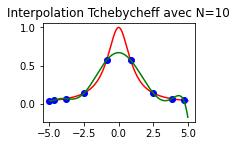

C:\Users\Asus\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3343: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


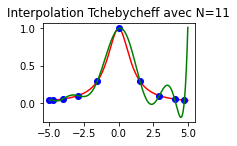

C:\Users\Asus\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3343: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


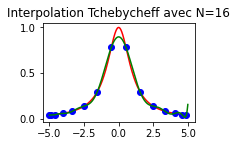

C:\Users\Asus\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3343: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


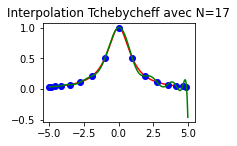

In [151]:
from numpy import linspace
from numpy import polyfit
from numpy import polyval
import matplotlib.pyplot as plt
N=10
f=lambda x:1/(1+x**2)
Xt=tcheb(-5,5,N)
t=linspace(-5,5,1000)
Yt=[]
for i in Xt:
    Yt.append(f(i))
pt=polyfit(Xt,Yt,N-1)
plt.subplot(2,2,1)
plt.plot(t,f(t),'r',Xt,Yt,'ob', t, polyval(pt,t),'g')
plt.title("Interpolation Tchebycheff avec N=10")
plt.show()
#######################################
N=11
f=lambda x:1/(1+x**2)
Xt=tcheb(-5,5,N)
t=linspace(-5,5,1000)
Yt=[]
for i in Xt:
    Yt.append(f(i))
pt=polyfit(Xt,Yt,N-1)
plt.subplot(2,2,2)
plt.plot(t,f(t),'r',Xt,Yt,'ob', t, polyval(pt,t),'g')
plt.title("Interpolation Tchebycheff avec N=11")
plt.show()
################################################
N=16
f=lambda x:1/(1+x**2)
Xt=tcheb(-5,5,N)
t=linspace(-5,5,1000)
Yt=[]
for i in Xt:
    Yt.append(f(i))
pt=polyfit(Xt,Yt,N-1)
plt.subplot(2,2,1)
plt.plot(t,f(t),'r',Xt,Yt,'ob', t, polyval(pt,t),'g')
plt.title("Interpolation Tchebycheff avec N=16")
plt.show()
#################################################
N=17
f=lambda x:1/(1+x**2)
Xt=tcheb(-5,5,N)
t=linspace(-5,5,1000)
Yt=[]
for i in Xt:
    Yt.append(f(i))
pt=polyfit(Xt,Yt,N-1)
plt.subplot(2,2,1)
plt.plot(t,f(t),'r',Xt,Yt,'ob', t, polyval(pt,t),'g')
plt.title("Interpolation Tchebycheff avec N=17")
plt.show()


<u><font color="green"><b>Exercice 3 :</b></font></u>

In [ ]:
def f(x):
    return intnx(x,f)
#function f=intN(x,f) # RECURSIVE
m=len(x)
for k in range(2,m):
    f(k:m)=(f(k:m)-f(k-1:m-1))./(x(k:m)-x(1:m+1-k))